# Dataset 1: Big Mart Sales Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [10]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [11]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [12]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [13]:
df['Item_Weight'].isnull().sum()

0

In [14]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [16]:
df['Outlet_Size'].isnull().sum()

0

In [17]:
sum(df['Item_Visibility']==0)

526

In [18]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [19]:
sum(df['Item_Visibility']==0)

0

In [20]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [22]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [23]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [24]:
# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [25]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

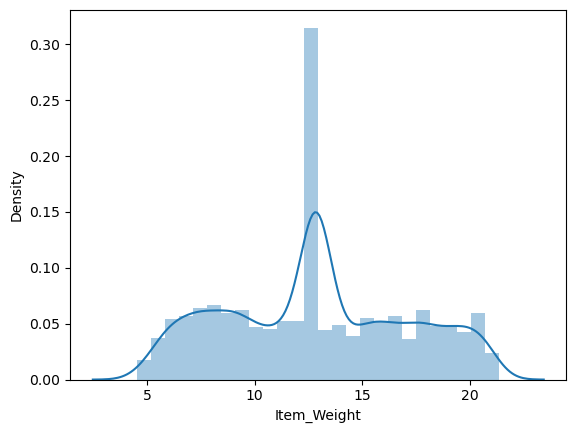

In [27]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

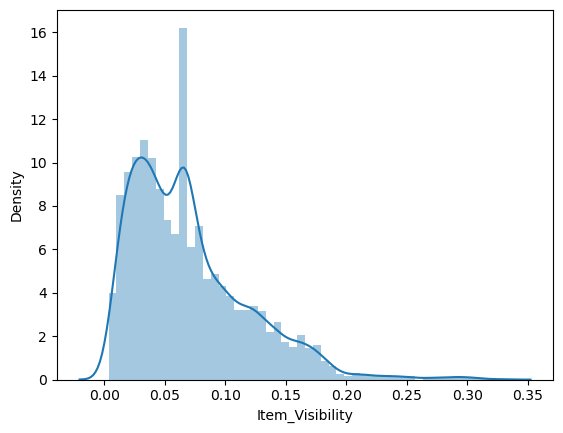

In [28]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

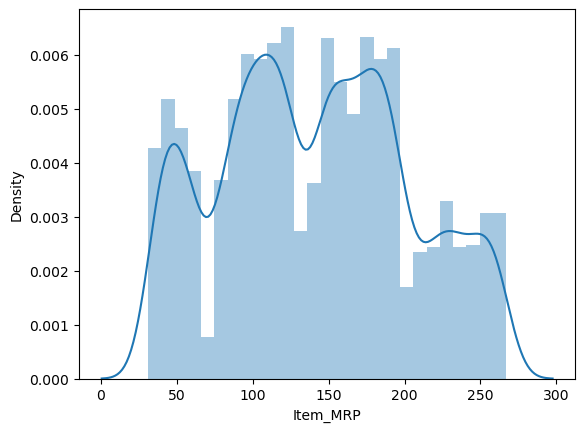

In [29]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

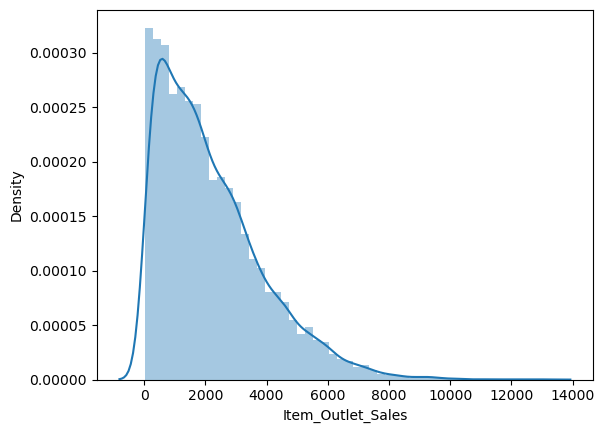

In [30]:
sns.distplot(df['Item_Outlet_Sales'])

In [31]:
# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

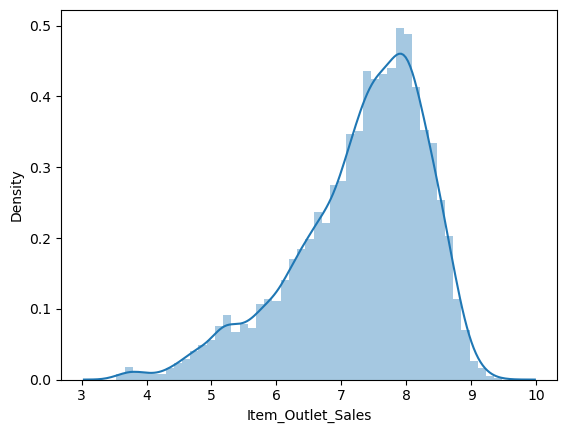

In [32]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

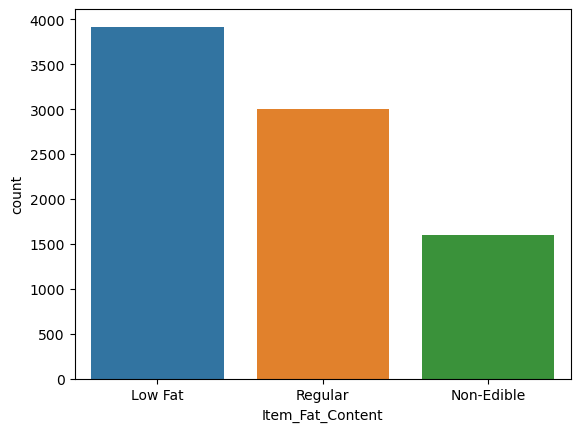

In [33]:
sns.countplot(df["Item_Fat_Content"])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

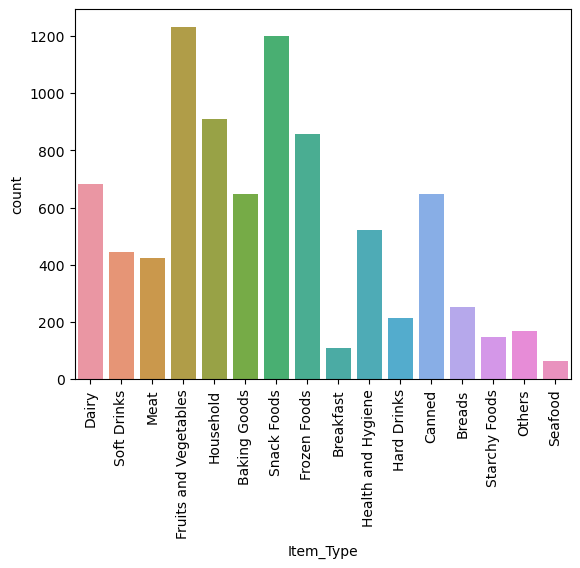

In [34]:
# plt.figure(figsize=(15,5))
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

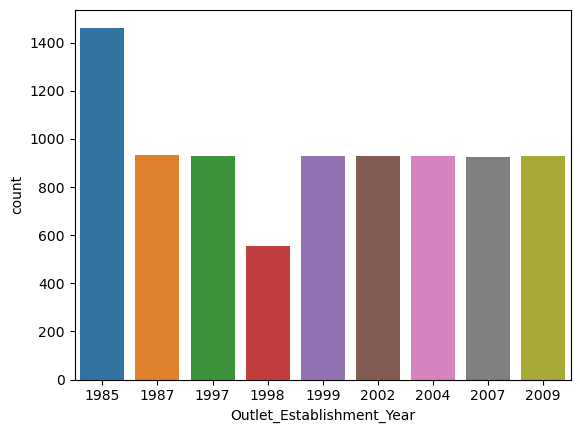

In [35]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

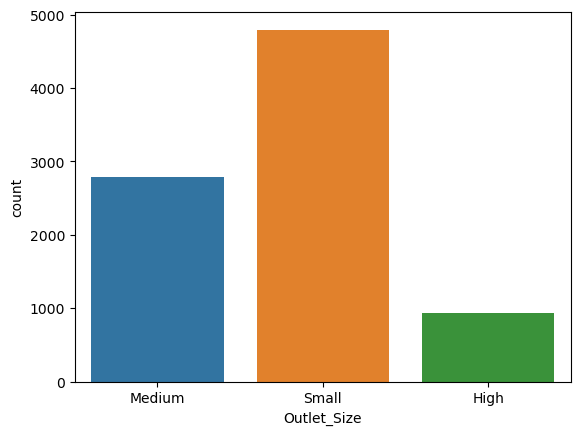

In [36]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

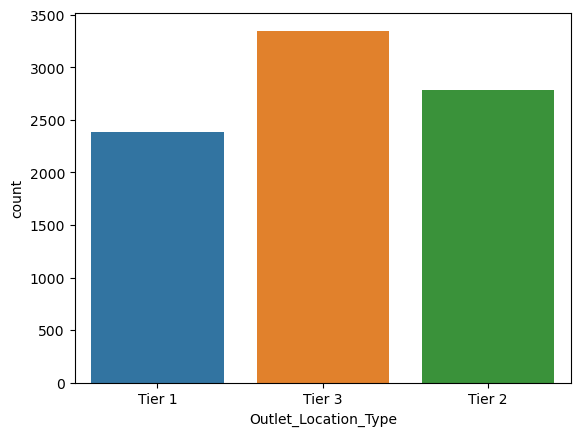

In [37]:
sns.countplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

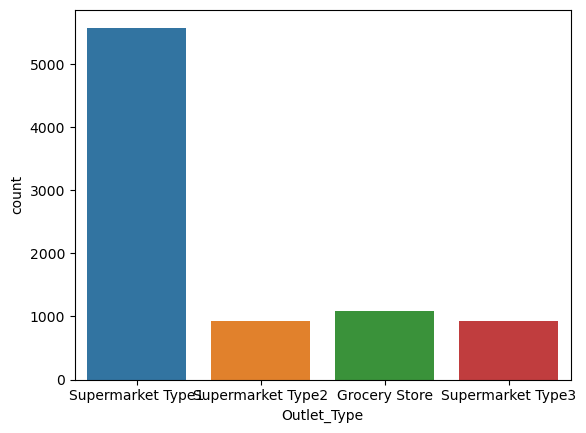

In [38]:
sns.countplot(df['Outlet_Type'])

<AxesSubplot:>

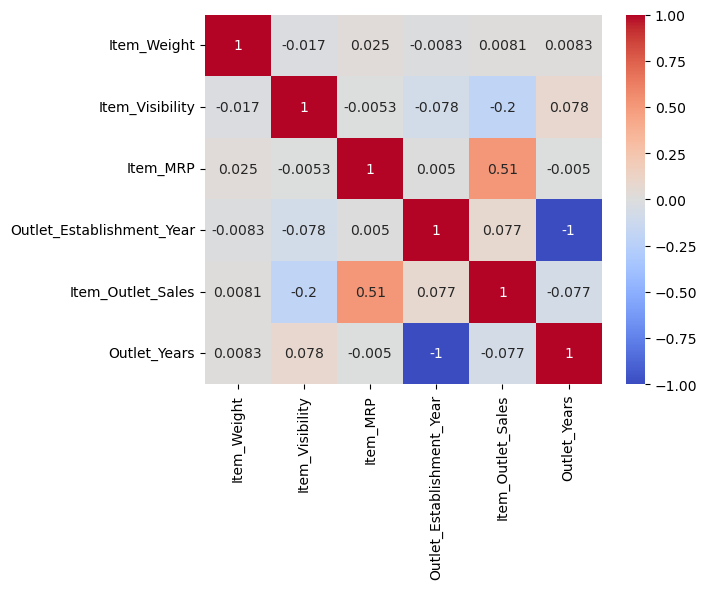

In [39]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [40]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# select the columns to use for the model
X = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
        'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales']]
y = df['Item_Outlet_Sales']

# create dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# train the model
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

# predict the testing set
y_pred = model.predict(X_test)

# perform cross-validation
cv_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

print("Model Report")
print("MSE:",mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:",np.mean(np.abs(y_test - y_pred)))
print("R-Squared:",model.score(X_test, y_test))
print("CV Score:", cv_score)

Model Report
MSE: 3.161227058605609e-30
RMSE: 1.777983987162317e-15
MAE: 1.4132715851298768e-15
R-Squared: 1.0
CV Score: 5.661148034162879e-30


In [42]:
import statsmodels.api as sm

# select the columns to use for the model
X = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
        'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales']]
y = df['Item_Outlet_Sales']

# create dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

# add a constant to the X matrix for the intercept term
X = sm.add_constant(X)

# create a linear regression model object
model = sm.OLS(y, X)

# fit the model
results = model.fit()

# print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.063e+28
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        00:01:07   Log-Likelihood:             2.4126e+05
No. Observations:                8523   AIC:                        -4.825e+05
Df Residuals:                    8494   BIC:                        -4.823e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# select the columns to use for the model
X = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
        'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type']]
y = df['Item_Outlet_Sales']

# create dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a random forest regression model object
model = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model on the training data
model.fit(X_train, y_train)

# predict the sales on the testing data
y_pred = model.predict(X_test)

# perform cross-validation
cv_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

print("Model Report")
print("MSE:",mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:",np.mean(np.abs(y_test - y_pred)))
print("R-Squared:",model.score(X_test, y_test))
print("CV Score:", cv_score)

Model Report
MSE: 0.30051614222556633
RMSE: 0.5481935262528793
MAE: 0.4273394324755866
R-Squared: 0.7141600509163191
CV Score: 0.3112008780704316


In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# select the columns to use for the model
X = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
        'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type']]
y = df['Item_Outlet_Sales']

# create dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# set the parameters for the model
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 42
}

# train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# predict the sales on the testing data
y_pred = model.predict(dtest)

# perform cross-validation
cv_results = xgb.cv(params, dtrain, num_boost_round=100, nfold=5, metrics='rmse', seed=42)
cv_score = cv_results['test-rmse-mean'].iloc[-1]

print("Model Report")
print("MSE:",mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:",np.mean(np.abs(y_test - y_pred)))
print("R-Squared:", r2_score(y_test, y_pred))

Model Report
MSE: 0.2703295559064614
RMSE: 0.5199322608825706
MAE: 0.404627625247065
R-Squared: 0.742872426340021


# Dataset 2 : Black Friday Sales Prediction

In [51]:
df = pd.read_csv('black_train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [52]:
# statistical info
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [53]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [54]:
# find unique values
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

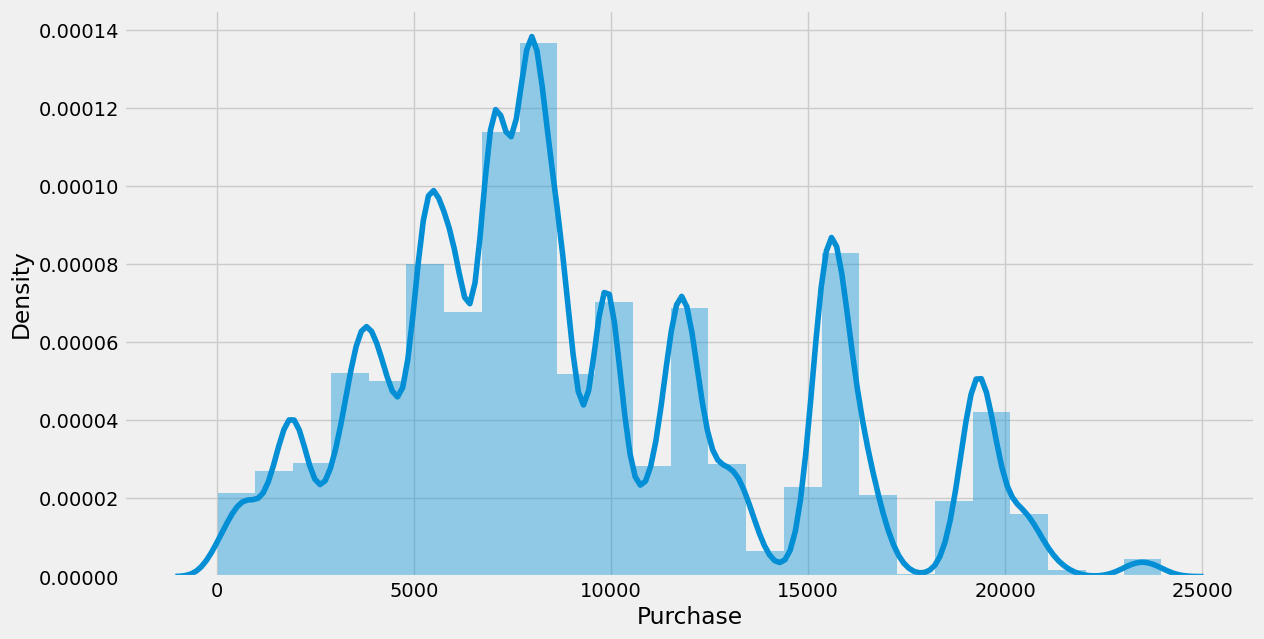

In [55]:
# distplot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['Purchase'], bins=25)

<AxesSubplot:xlabel='Gender', ylabel='count'>

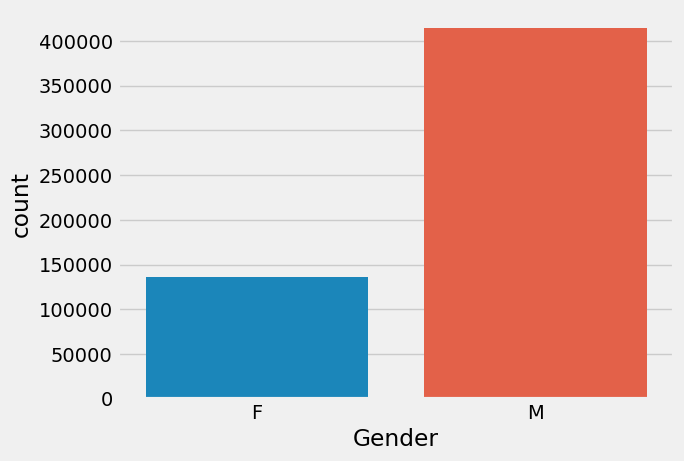

In [56]:
# distribution of numeric variables
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

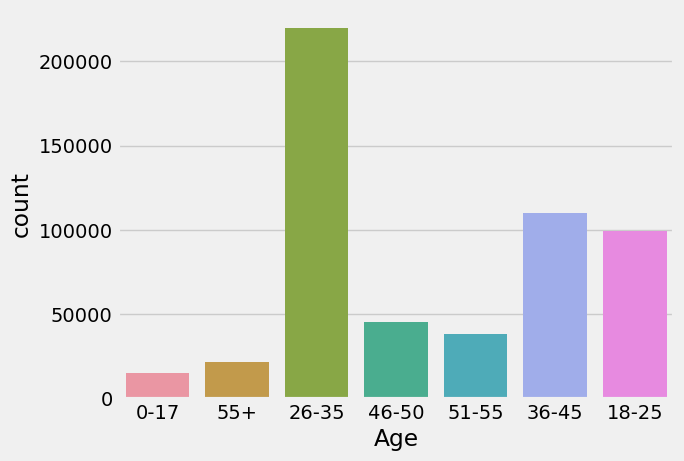

In [57]:
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

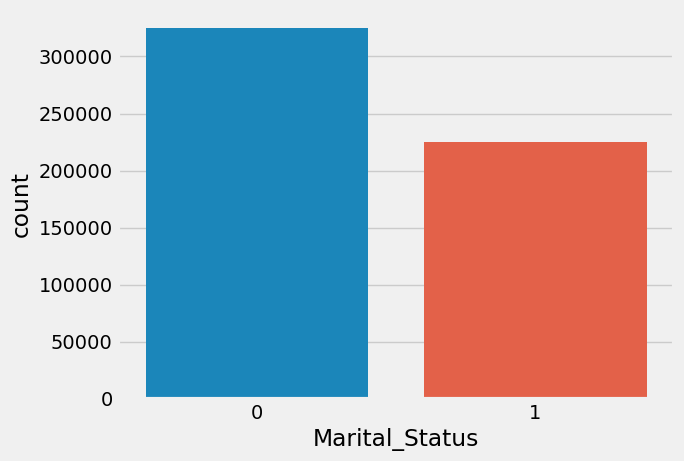

In [58]:
sns.countplot(df['Marital_Status'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

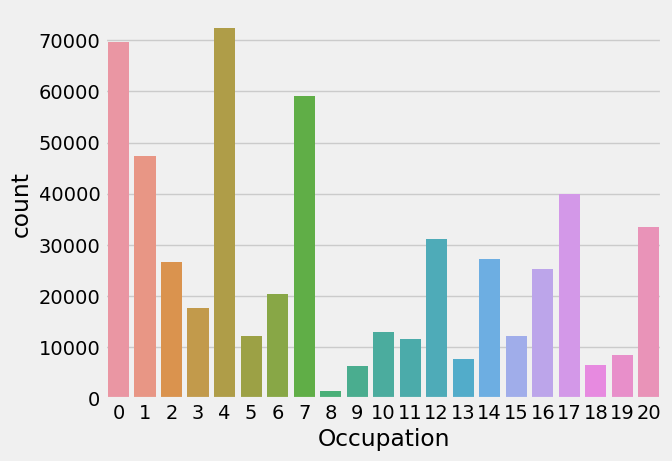

In [59]:
sns.countplot(df['Occupation'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

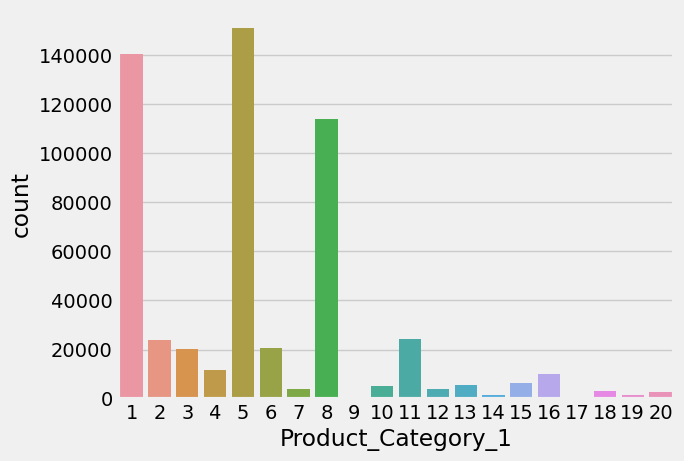

In [60]:
sns.countplot(df['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

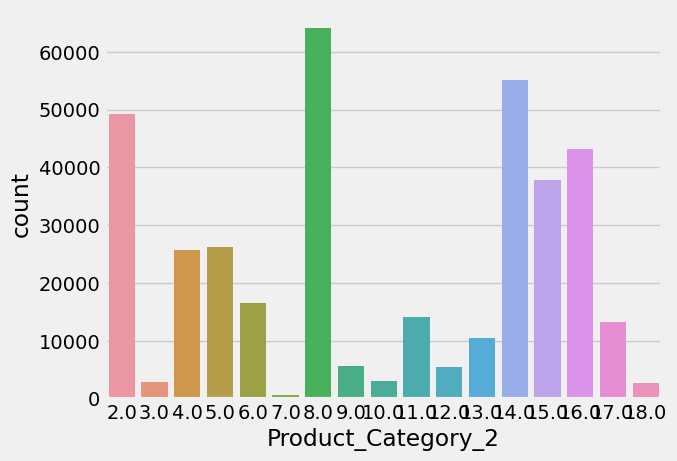

In [61]:
sns.countplot(df['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

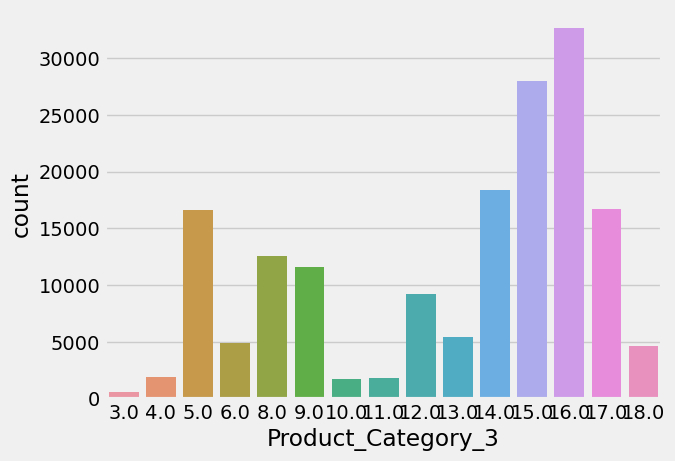

In [62]:
sns.countplot(df['Product_Category_3'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

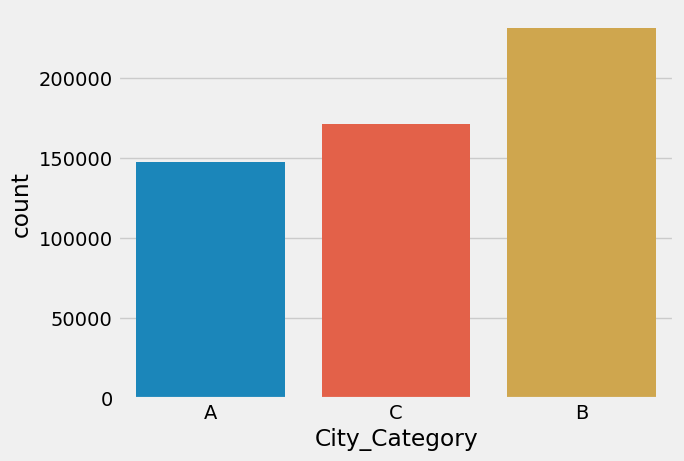

In [63]:
sns.countplot(df['City_Category'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

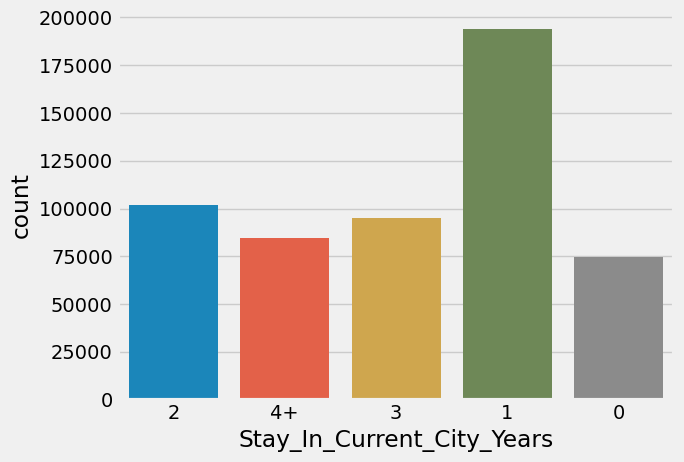

In [64]:
sns.countplot(df['Stay_In_Current_City_Years'])

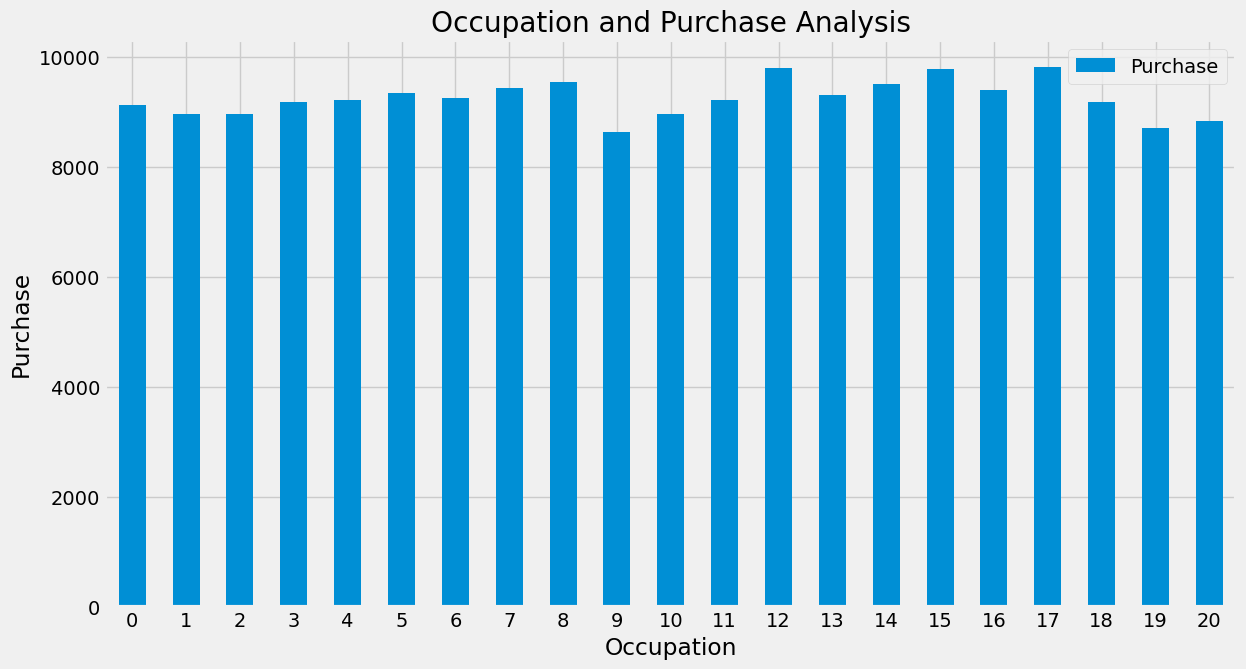

In [65]:
# bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

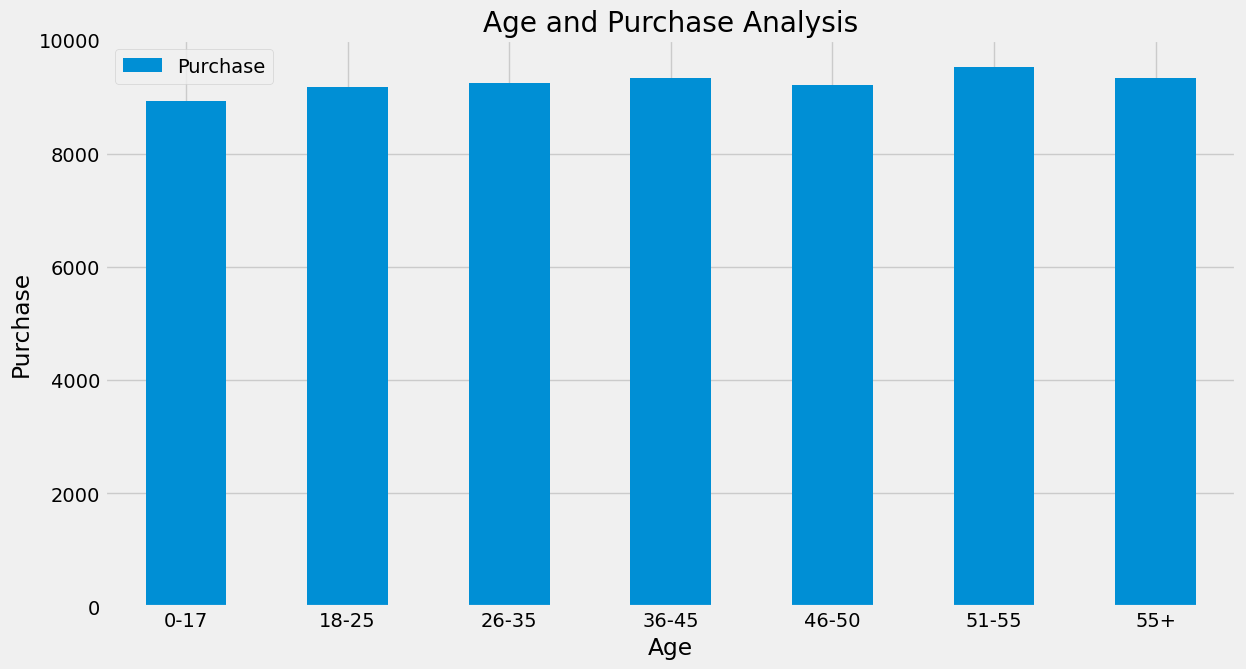

In [66]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

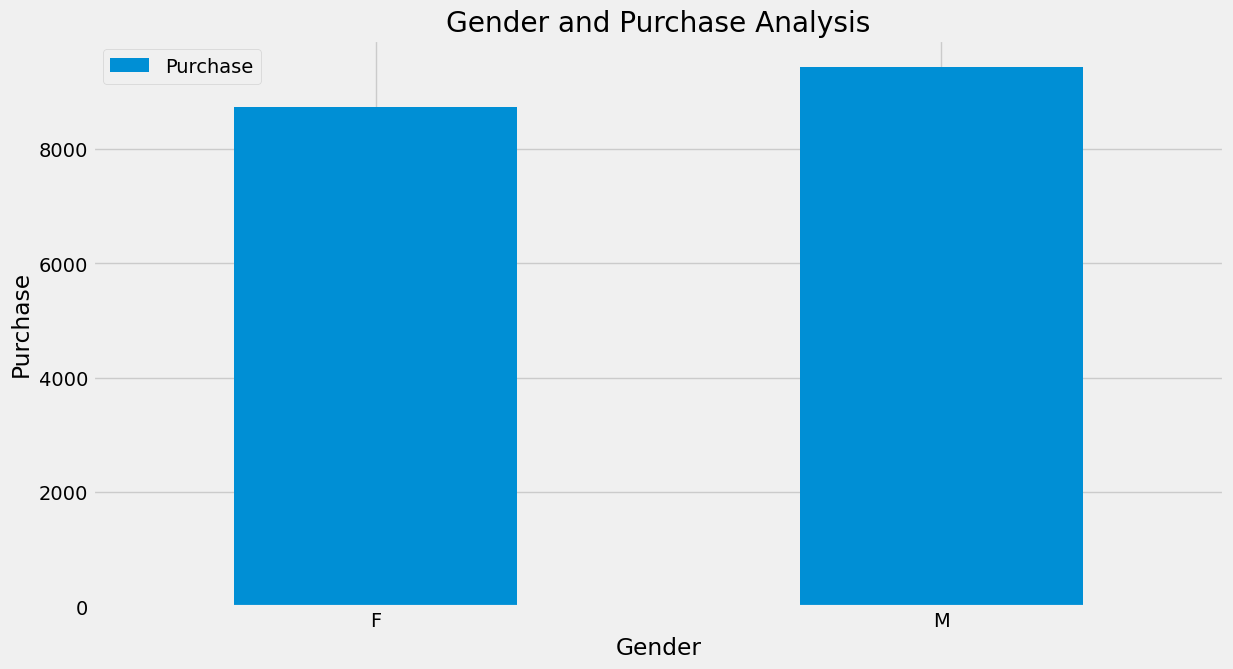

In [67]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [68]:
# check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [69]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")

In [70]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [71]:
# encoding values using dict
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [72]:
# to improve the metric use one hot encoding
# label encoding
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


<AxesSubplot:>

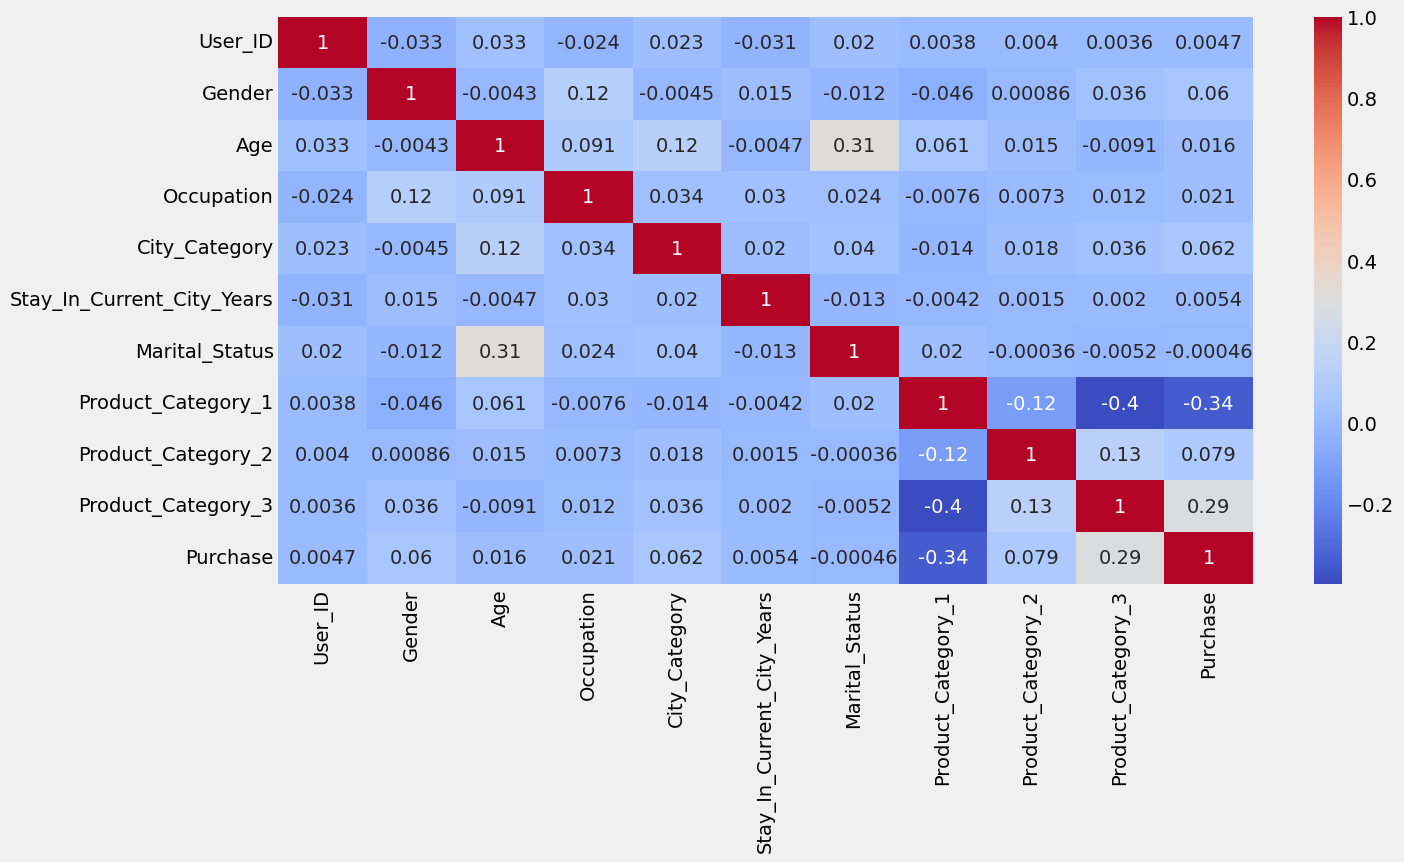

In [73]:
corr = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [74]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [75]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
dtr = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dtr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dtr.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# R-Squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-Squared:", r2)

# Cross-Validation Score (CV Score)
cv_score = cross_val_score(dtr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_score)
print("CV RMSE:", cv_rmse)

MSE: 11251121.844586613
RMSE: 3354.269196797808
MAE: 2369.93339861783
R-Squared: 0.5522151847495453
CV RMSE: [3345.49384015 3339.65691871 3330.44118911 3344.7980908  3337.08102205]


In [77]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [81]:
import xgboost as xgb

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the model
xgb_model = xgb.train(params, dtrain)

# Make predictions on the testing data
y_pred = xgb_model.predict(dtest)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a new instance of the XGBRegressor class
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5, learning_rate=0.1, n_estimators=100)

# Compute the cross-validation scores
cv_scores = cross_val_score(xgb_reg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())

# Print the results
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-Squared:', r2)
print('CV RMSE:', cv_rmse)

[00:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

MSE: 22634159.678506684
RMSE: 4757.537144206725
MAE: 3787.858631730784
R-Squared: 0.09918022842620866
CV RMSE: 2935.1286184988885


In [79]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scikit-learn linear regression
from sklearn.linear_model import LinearRegression

# fit the model to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions on the testing data
y_pred_lr = lr.predict(X_test)

# statsmodels linear regression
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr_sm = sm.OLS(y_train,X_train_sm).fit()
X_test_sm = sm.add_constant(X_test)
y_pred_sm = lr_sm.predict(X_test_sm)

# scikit-learn linear regression for cross-validation
lr_cv = LinearRegression()
lr_cv.fit(X_train, y_train)

# mean squared error (MSE)
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_sm = mean_squared_error(y_test, y_pred_sm)
print("MSE Scikit-learn Linear Regression: ", mse_lr)
print("MSE Statsmodels Linear Regression: ", mse_sm)

# root mean squared error (RMSE)
rmse_lr = np.sqrt(mse_lr)
rmse_sm = np.sqrt(mse_sm)
print("RMSE Scikit-learn Linear Regression: ", rmse_lr)
print("RMSE Statsmodels Linear Regression: ", rmse_sm)

# mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_sm = mean_absolute_error(y_test, y_pred_sm)
print("MAE Scikit-learn Linear Regression: ", mae_lr)
print("MAE Statsmodels Linear Regression: ", mae_sm)

# R-squared (R2)
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test, y_pred_lr)
r2_sm = r2_score(y_test, y_pred_sm)
print("R-squared Scikit-learn Linear Regression: ", r2_lr)
print("R-squared Statsmodels Linear Regression: ", r2_sm)

# cross-validation score (CV score)
from sklearn.model_selection import cross_val_score
cv_score_lr = cross_val_score(lr_cv, X, y, cv=5, scoring='neg_mean_squared_error')
cv_score_sm = cross_val_score(lr_cv, X, y, cv=5, scoring='neg_mean_squared_error')

print("CV Score Scikit-learn Linear Regression: ", cv_score_lr)
print("CV Score Statsmodels Linear Regression: ", cv_score_sm)

MSE Scikit-learn Linear Regression:  21303239.683336858
MSE Statsmodels Linear Regression:  21303239.683336873
RMSE Scikit-learn Linear Regression:  4615.543270660221
RMSE Statsmodels Linear Regression:  4615.543270660223
MAE Scikit-learn Linear Regression:  3522.467068212068
MAE Statsmodels Linear Regression:  3522.4670682121227
R-squared Scikit-learn Linear Regression:  0.15214968092902736
R-squared Statsmodels Linear Regression:  0.15214968092902692
CV Score Scikit-learn Linear Regression:  [-21325739.0795623  -21424674.51850312 -21478207.97026775
 -21453054.2606475  -21283148.23582784]
CV Score Statsmodels Linear Regression:  [-21325739.0795623  -21424674.51850312 -21478207.97026775
 -21453054.2606475  -21283148.23582784]


In [80]:
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     8876.
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        00:32:36   Log-Likelihood:            -4.3380e+06
No. Observations:              440054   AIC:                         8.676e+06
Df Residuals:                  440044   BIC:                         8.676e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Dataset 3: Mall Customer Segmentation

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import cv2
import scipy.cluster.hierarchy as sch
import fastcluster

In [83]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')

In [84]:
# EDA
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [85]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


<AxesSubplot:xlabel='Gender', ylabel='count'>

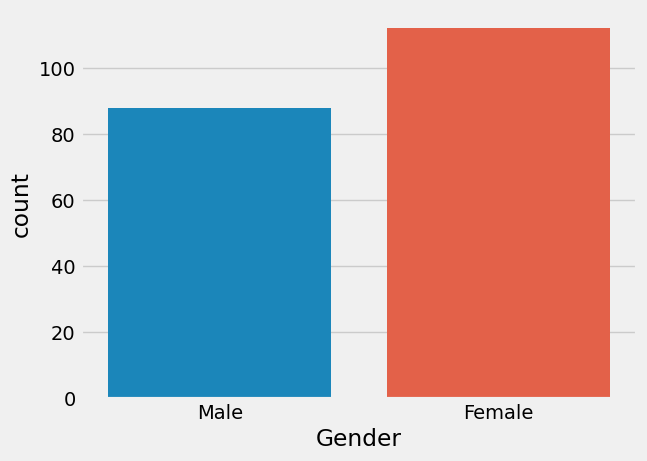

In [86]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

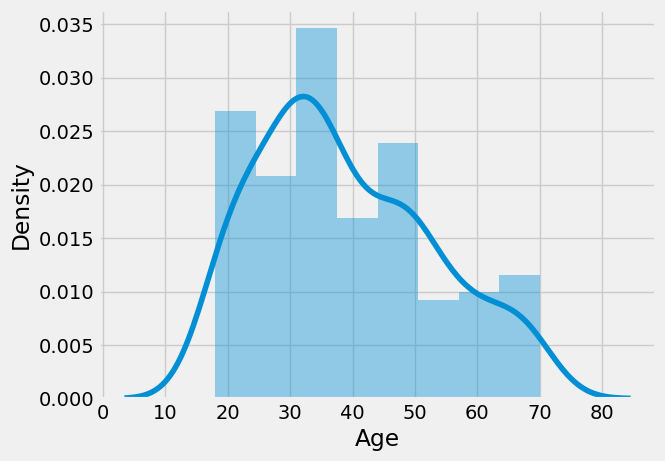

In [87]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

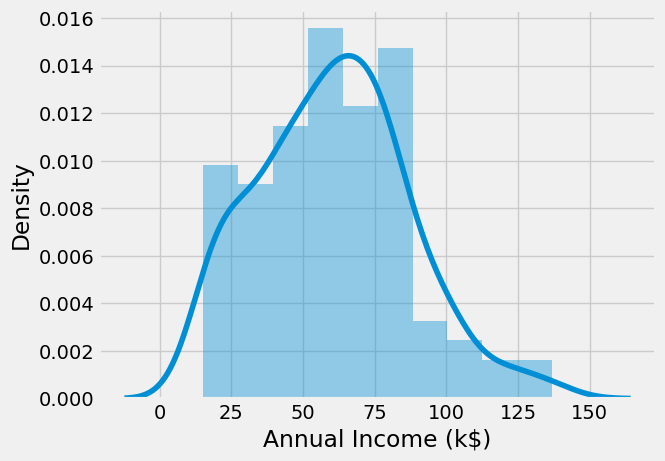

In [88]:
sns.distplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

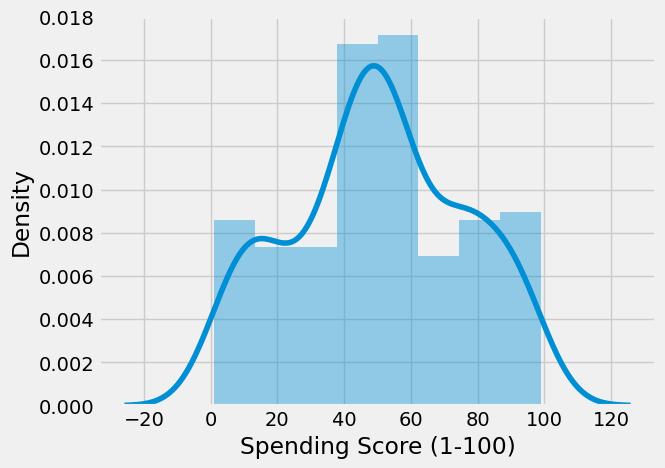

In [89]:
sns.distplot(df['Spending Score (1-100)'])

<AxesSubplot:>

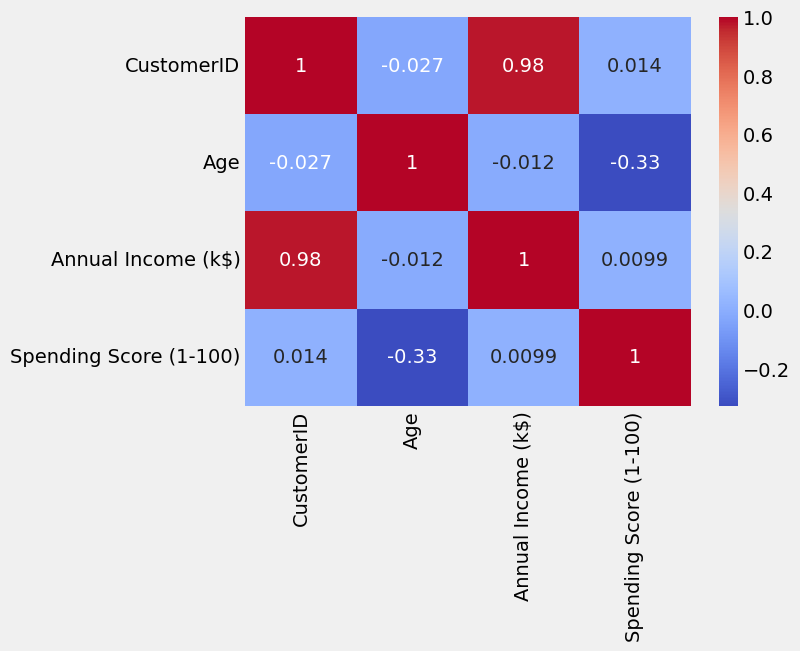

In [90]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [91]:
# Clustering on 2 features
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

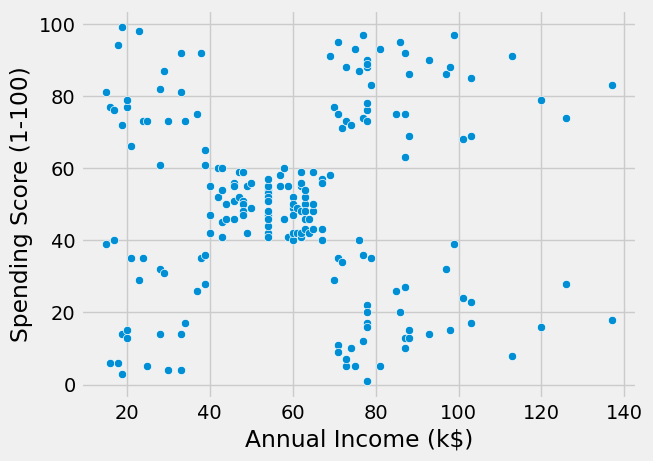

In [92]:
# Scatter plot
sns.scatterplot(df1['Annual Income (k$)'], df1['Spending Score (1-100)'])

In [93]:
# K-Means Clustering using scikit-learn
kmeans_sklearn = KMeans(n_clusters=5)
kmeans_sklearn.fit(df1)
df1['KMeans_Sklearn_Cluster'] = kmeans_sklearn.labels_

In [94]:
# Evaluate clustering using Silhouette Score and Calinski-Harabasz Index
kmeans_silhouette_score_sklearn = silhouette_score(df1, kmeans_sklearn.labels_)
kmeans_calinski_harabasz_score_sklearn = calinski_harabasz_score(df1, kmeans_sklearn.labels_)

In [95]:
print("K-Means Clustering using scikit-learn")
print("Silhouette Score:", kmeans_silhouette_score_sklearn)
print("Calinski-Harabasz Index:", kmeans_calinski_harabasz_score_sklearn)

K-Means Clustering using scikit-learn
Silhouette Score: 0.5553640862603758
Calinski-Harabasz Index: 247.78515118628783


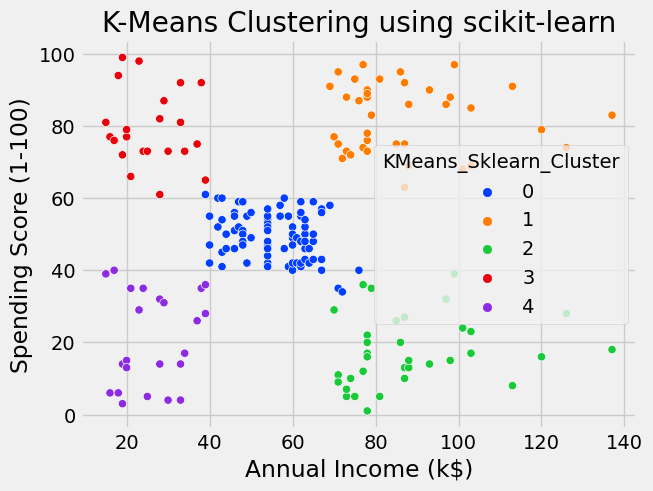

In [96]:
# Plot clusters obtained from K-Means Clustering using scikit-learn
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='KMeans_Sklearn_Cluster', palette='bright')
plt.title('K-Means Clustering using scikit-learn')
plt.show()

In [97]:
# K-Means Clustering using OpenCV
kmeans_opencv = cv2.kmeans(np.float32(df1), 5, None, (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0), 10, cv2.KMEANS_RANDOM_CENTERS)
df1['KMeans_OpenCV_Cluster'] = kmeans_opencv[1].flatten()

In [98]:
# Evaluate clustering using Silhouette Score and Calinski-Harabasz Index
kmeans_silhouette_score_opencv = silhouette_score(df1, df1['KMeans_OpenCV_Cluster'])
kmeans_calinski_harabasz_score_opencv = calinski_harabasz_score(df1, df1['KMeans_OpenCV_Cluster'])

In [99]:
print("\nK-Means Clustering using OpenCV")
print("Silhouette Score:", kmeans_silhouette_score_opencv)
print("Calinski-Harabasz Index:", kmeans_calinski_harabasz_score_opencv)


K-Means Clustering using OpenCV
Silhouette Score: 0.556058458291997
Calinski-Harabasz Index: 248.1147927025642


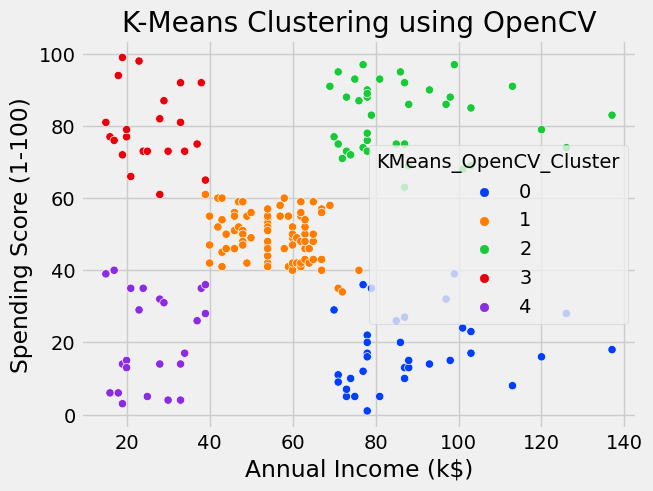

In [100]:
# Plot clusters obtained from K-Means Clustering using OpenCV
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='KMeans_OpenCV_Cluster', palette='bright')
plt.title('K-Means Clustering using OpenCV')
plt.show()

In [101]:
# Hierarchical Clustering using scipy
distance_matrix = sch.distance.pdist(df1)
Z = sch.linkage(distance_matrix, method='ward')
df1['Hierarchical_Cluster_Scipy'] = sch.cut_tree(Z, n_clusters=5).flatten()

In [102]:
# Evaluate clustering using Silhouette Score and Calinski-Harabasz Index
hierarchical_silhouette_score_scipy = silhouette_score(df1, df1['Hierarchical_Cluster_Scipy'])
hierarchical_calinski_harabasz_score_scipy = calinski_harabasz_score(df1, df1['Hierarchical_Cluster_Scipy'])

In [103]:
print("\nHierarchical Clustering using scipy")
print("Silhouette Score:", hierarchical_silhouette_score_scipy)
print("Calinski-Harabasz Index:", hierarchical_calinski_harabasz_score_scipy)


Hierarchical Clustering using scipy
Silhouette Score: 0.5551641272427374
Calinski-Harabasz Index: 243.93648525221835


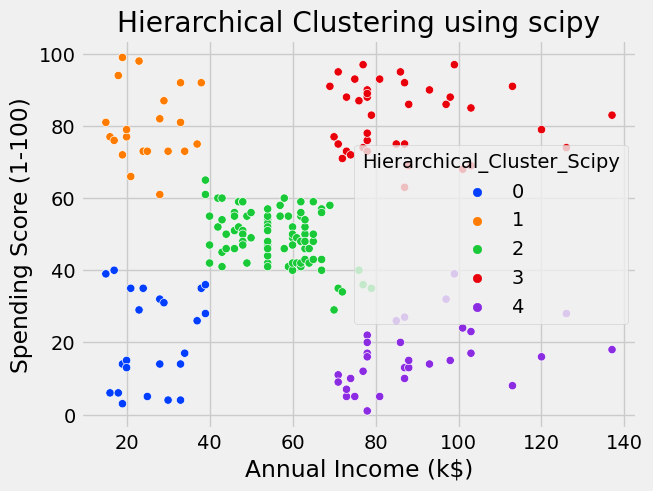

In [104]:
# Plot clusters obtained from Hierarchical Clustering using scipy
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Hierarchical_Cluster_Scipy', palette='bright')
plt.title('Hierarchical Clustering using scipy')
plt.show()

In [105]:
# Hierarchical Clustering using fastcluster
distance_matrix = fastcluster.linkage(df1, method='ward')
clusters = sch.cut_tree(distance_matrix, n_clusters=5).flatten()
df1['Hierarchical_Cluster_Fastcluster'] = clusters

In [106]:
# Evaluate clustering using Silhouette Score and Calinski-Harabasz Index
hierarchical_silhouette_score_fastcluster = silhouette_score(df1, clusters)
hierarchical_calinski_harabasz_score_fastcluster = calinski_harabasz_score(df1, clusters)

In [107]:
print("\nHierarchical Clustering using fastcluster")
print("Silhouette Score:", hierarchical_silhouette_score_fastcluster)
print("Calinski-Harabasz Index:", hierarchical_calinski_harabasz_score_fastcluster)


Hierarchical Clustering using fastcluster
Silhouette Score: 0.5555996103750039
Calinski-Harabasz Index: 244.23195455228932


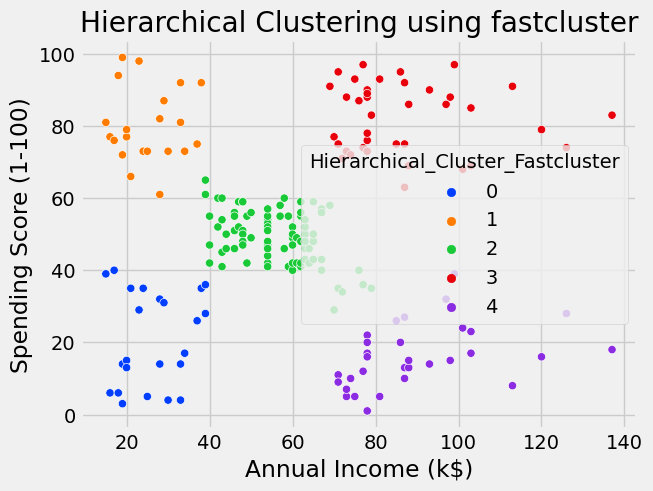

In [108]:
# Plot clusters obtained from Hierarchical Clustering using fastcluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Hierarchical_Cluster_Fastcluster', palette='bright')
plt.title('Hierarchical Clustering using fastcluster')
plt.show()